In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supply-chain-cel-dataset/canceled_test.csv
/kaggle/input/supply-chain-cel-dataset/Data Science Case Study.pdf
/kaggle/input/supply-chain-cel-dataset/sales_test.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting Daily Volume

In [3]:
#Reading and merging 2 files
df1 = pd.read_csv("/kaggle/input/supply-chain-cel-dataset/canceled_test.csv")
df2 = pd.read_csv("/kaggle/input/supply-chain-cel-dataset/sales_test.csv")
lst = [df2,df1]
df = pd.concat(lst)

<AxesSubplot:>

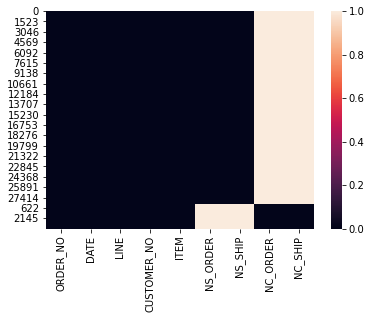

In [4]:
#Checking for null values in the dataframe
sns.heatmap(df.isnull())

In [5]:
#Converting the 'DATE' column in the standard date-time format and sorting
df['DATE'] = pd.to_datetime(df['DATE'])
df.sort_values('DATE')

,ORDER_NO,DATE,LINE,CUSTOMER_NO,ITEM,NS_ORDER,NS_SHIP,NC_ORDER,NC_SHIP
0,528758,2017-01-03,1,1358538.0,111931,70.0,70.0,NaN,NaN
174,528861,2017-01-03,3,43823773.0,1038324,1.0,1.0,NaN,NaN
175,528861,2017-01-03,4,43823773.0,110441,2.0,2.0,NaN,NaN
176,528861,2017-01-03,5,43823773.0,1040991,1.0,1.0,NaN,NaN
177,528862,2017-01-03,1,1431059.0,10098739,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
28311,543762,2017-02-28,1,1255123.0,113106,300.0,300.0,NaN,NaN
28312,543764,2017-02-28,2,43825307.0,10131275,400.0,400.0,NaN,NaN
28313,543765,2017-02-28,1,43825307.0,10131275,300.0,300.0,NaN,NaN
28308,543755,2017-02-28,1,1664631.0,1040776,1.0,1.0,NaN,NaN


In [6]:
#Grouping by date and reseting index to make column name as 'DATE' again
item_plot = df.groupby('DATE').sum()
item_plot = item_plot.reset_index()

In [7]:
#Constructing the 'VOLUME' column and correcting for some rows - 
#where orders are cancelled without having a sale (manual/software error)
item_plot['VOLUME'] = item_plot['NS_ORDER'] - item_plot['NC_ORDER']
Vol = np.array(item_plot['VOLUME'])
Vol[Vol<0] = 0
item_plot['VOLUME'] = Vol
item_plot.head()

,DATE,ORDER_NO,LINE,CUSTOMER_NO,ITEM,NS_ORDER,NS_SHIP,NC_ORDER,NC_SHIP,VOLUME
0,2017-01-03,144899721,794,2.563067e+09,1114470162,4630.0,4630.0,10.0,10.0,4620.0
1,2017-01-04,438682222,2244,5.629515e+09,3638993990,2690.0,2690.0,1432.0,1432.0,1258.0
2,2017-01-05,284385026,1215,4.069072e+09,2347846738,1213.0,1213.0,41.0,41.0,1172.0
3,2017-01-06,631779070,4054,9.190185e+09,5037998112,3070.0,3070.0,441.0,441.0,2629.0
4,2017-01-07,112428775,514,2.467176e+09,666550486,449.0,449.0,35.0,35.0,414.0


Text(0, 0.5, 'Volume')

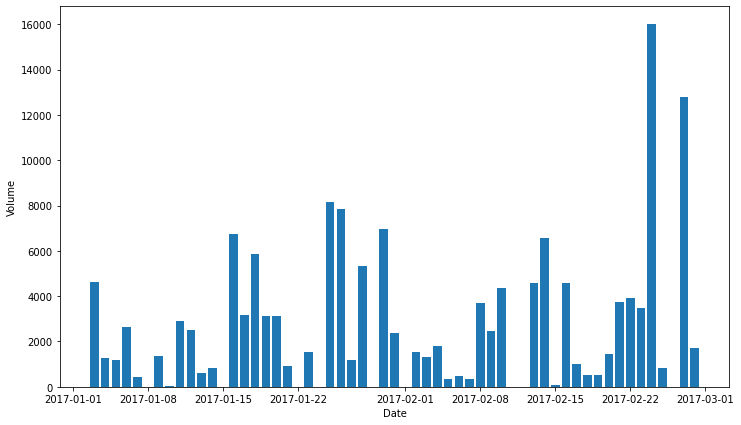

In [8]:
#Plotting the daily Volume
plt.figure(figsize=(12,7))
plt.bar(item_plot['DATE'],item_plot['VOLUME']) # A bar chart
plt.xlabel('Date')
plt.ylabel('Volume')

# ABC Analysis

In [9]:
#ABC analysis per SKU
#Reading and merging 2 files
df1 = pd.read_csv("/kaggle/input/supply-chain-cel-dataset/canceled_test.csv")
df2 = pd.read_csv("/kaggle/input/supply-chain-cel-dataset/sales_test.csv")
lst = [df2,df1]
df = pd.concat(lst)
df

,ORDER_NO,DATE,LINE,CUSTOMER_NO,ITEM,NS_ORDER,NS_SHIP,NC_ORDER,NC_SHIP
0,528758,"Tuesday, January 3, 2017",1,1358538.0,111931,70.0,70.0,NaN,NaN
1,528791,"Tuesday, January 3, 2017",1,1254798.0,1029071,10.0,10.0,NaN,NaN
2,528791,"Tuesday, January 3, 2017",2,1254798.0,1033341,10.0,10.0,NaN,NaN
3,528791,"Tuesday, January 3, 2017",3,1254798.0,1040827,5.0,5.0,NaN,NaN
4,528791,"Tuesday, January 3, 2017",4,1254798.0,10106111,10.0,10.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3657,543485,"Saturday, February 25, 2017",8,2203715.0,10135140,NaN,NaN,3.0,3.0
3658,543488,"Saturday, February 25, 2017",6,2203449.0,1040468,NaN,NaN,2.0,2.0
3659,543488,"Saturday, February 25, 2017",7,2203449.0,1040466,NaN,NaN,1.0,1.0
3660,543491,"Saturday, February 25, 2017",5,2203449.0,10135358,NaN,NaN,21.0,21.0


In [10]:
#Grouping by ITEM No.
df = df.groupby('ITEM').sum()


#Constructing the 'VOLUME' column and correcting for some rows where orders are cancelled without having a sale (manual/software error)
df['VOLUME'] = df['NS_ORDER'] - df['NC_ORDER']
Vol = np.array(df['VOLUME'])
Vol[Vol<0] = 0
df['VOLUME'] = Vol

In [11]:
#Sorting and constructing column for cumulative values
df = df.sort_values('VOLUME',ascending=False)
df['CUMULATIVE'] = df['VOLUME'].cumsum(axis = 0)
df = df.reset_index()
df

,ITEM,ORDER_NO,LINE,CUSTOMER_NO,NS_ORDER,NS_SHIP,NC_ORDER,NC_SHIP,VOLUME,CUMULATIVE
0,10098739,1435703877,4594,2.421399e+10,27173.0,27173.0,1858.0,1858.0,25315.0,25315.0
1,1041106,707100866,6378,1.171067e+10,13178.0,13178.0,1091.0,1091.0,12087.0,37402.0
2,1040765,872068365,5246,1.528122e+10,11980.0,11980.0,1865.0,1865.0,10115.0,47517.0
3,111931,39722395,76,5.372718e+08,15575.0,15575.0,6315.0,6315.0,9260.0,56777.0
4,110441,1075016120,6479,1.739143e+10,9600.0,9600.0,430.0,430.0,9170.0,65947.0
...,...,...,...,...,...,...,...,...,...,...
74,1040477,4805131,86,1.263812e+07,0.0,0.0,127.0,127.0,0.0,152527.0
75,1040517,8537775,148,2.765534e+08,0.0,0.0,108.0,108.0,0.0,152527.0
76,1040992,74284721,811,7.646703e+08,182.0,182.0,193.0,193.0,0.0,152527.0
77,10102556,530144,1,1.255193e+06,0.0,0.0,2.0,2.0,0.0,152527.0


In [12]:
#ABC Analysis
x = df['CUMULATIVE'].iloc[-1]

def ABC_category(value):
    if value > 0 and value < 0.8*x:
        return 'A'
    elif value >= 0.8*x and value < 0.95*x:
        return 'B'
    else:
        return 'C'
    
df['CATEGORY'] = df['CUMULATIVE'].apply(ABC_category)
df

,ITEM,ORDER_NO,LINE,CUSTOMER_NO,NS_ORDER,NS_SHIP,NC_ORDER,NC_SHIP,VOLUME,CUMULATIVE,CATEGORY
0,10098739,1435703877,4594,2.421399e+10,27173.0,27173.0,1858.0,1858.0,25315.0,25315.0,A
1,1041106,707100866,6378,1.171067e+10,13178.0,13178.0,1091.0,1091.0,12087.0,37402.0,A
2,1040765,872068365,5246,1.528122e+10,11980.0,11980.0,1865.0,1865.0,10115.0,47517.0,A
3,111931,39722395,76,5.372718e+08,15575.0,15575.0,6315.0,6315.0,9260.0,56777.0,A
4,110441,1075016120,6479,1.739143e+10,9600.0,9600.0,430.0,430.0,9170.0,65947.0,A
...,...,...,...,...,...,...,...,...,...,...,...
74,1040477,4805131,86,1.263812e+07,0.0,0.0,127.0,127.0,0.0,152527.0,C
75,1040517,8537775,148,2.765534e+08,0.0,0.0,108.0,108.0,0.0,152527.0,C
76,1040992,74284721,811,7.646703e+08,182.0,182.0,193.0,193.0,0.0,152527.0,C
77,10102556,530144,1,1.255193e+06,0.0,0.0,2.0,2.0,0.0,152527.0,C


In [13]:
#Values per category
df['CATEGORY'].value_counts()

C    46
A    19
B    14
Name: CATEGORY, dtype: int64

**The 19 items in category 'A' make up for 80% of our sales and we should focus on them to increase profits**

In [14]:
#Finding the most Important items which make up 80% of the sales volume
df.loc[df['CATEGORY'] == 'A']

,ITEM,ORDER_NO,LINE,CUSTOMER_NO,NS_ORDER,NS_SHIP,NC_ORDER,NC_SHIP,VOLUME,CUMULATIVE,CATEGORY
0,10098739,1435703877,4594,2.421399e+10,27173.0,27173.0,1858.0,1858.0,25315.0,25315.0,A
1,1041106,707100866,6378,1.171067e+10,13178.0,13178.0,1091.0,1091.0,12087.0,37402.0,A
2,1040765,872068365,5246,1.528122e+10,11980.0,11980.0,1865.0,1865.0,10115.0,47517.0,A
3,111931,39722395,76,5.372718e+08,15575.0,15575.0,6315.0,6315.0,9260.0,56777.0,A
4,110441,1075016120,6479,1.739143e+10,9600.0,9600.0,430.0,430.0,9170.0,65947.0,A
5,1041105,630014315,6003,9.594641e+09,8501.0,8501.0,833.0,833.0,7668.0,73615.0,A
6,1040774,947560060,5743,1.477273e+10,8102.0,8102.0,899.0,899.0,7203.0,80818.0,A
7,10108314,24715653,269,1.986922e+08,6182.0,6182.0,450.0,450.0,5732.0,86550.0,A
8,1041108,499424433,4949,7.620402e+09,4460.0,4460.0,404.0,404.0,4056.0,90606.0,A
9,1038323,918849758,4769,1.281022e+10,4249.0,4249.0,201.0,201.0,4048.0,94654.0,A


In [15]:
#ABC Analysis per Customer Id
df1 = pd.read_csv("/kaggle/input/supply-chain-cel-dataset/canceled_test.csv")
df2 = pd.read_csv("/kaggle/input/supply-chain-cel-dataset/sales_test.csv")
lst = [df2,df1]
df3 = pd.concat(lst)
CN=df3.groupby("CUSTOMER_NO").sum()
CN['VOLUME']=CN['NS_SHIP']-CN['NC_SHIP']

In [16]:
Vol = np.array(CN['VOLUME'])
Vol[Vol<0] = 0
CN['VOLUME'] = Vol

In [17]:
CN = CN.sort_values('VOLUME',ascending=False).reset_index()
CN['CUMULATIVE'] = CN['VOLUME'].cumsum(axis = 0)
CN.head()

,CUSTOMER_NO,ORDER_NO,LINE,ITEM,NS_ORDER,NS_SHIP,NC_ORDER,NC_SHIP,VOLUME,CUMULATIVE
0,1255123.0,62865809,902,664182773,11629.0,11629.0,146.0,146.0,11483.0,11483.0
1,1255548.0,49870158,346,469481241,11567.0,11567.0,808.0,808.0,10759.0,22242.0
2,1740542.0,102098699,1294,1319528968,10697.0,10697.0,673.0,673.0,10024.0,32266.0
3,1254798.0,84102800,1062,905580120,9584.0,9584.0,710.0,710.0,8874.0,41140.0
4,1825549.0,63861312,810,637882268,8711.0,8711.0,50.0,50.0,8661.0,49801.0


In [18]:
x =CN['CUMULATIVE'].iloc[-1]

def ABC_category(value):
    if value > 0 and value < 0.8*x:
        return 'A'
    elif value >= 0.8*x and value < 0.95*x:
        return 'B'
    else:
        return 'C'

CN['CATEGORY'] = CN['CUMULATIVE'].apply(ABC_category)

In [19]:
CN['CATEGORY'].value_counts()

C    409
B    260
A     62
Name: CATEGORY, dtype: int64

**The 62 customers in category 'A' drive 80% of our sales and we should improve service levels for these customers to increase profits.**

In [20]:
CN.loc[CN['CATEGORY'] == 'A']

,CUSTOMER_NO,ORDER_NO,LINE,ITEM,NS_ORDER,NS_SHIP,NC_ORDER,NC_SHIP,VOLUME,CUMULATIVE,CATEGORY
0,1255123.0,62865809,902,664182773,11629.0,11629.0,146.0,146.0,11483.0,11483.0,A
1,1255548.0,49870158,346,469481241,11567.0,11567.0,808.0,808.0,10759.0,22242.0,A
2,1740542.0,102098699,1294,1319528968,10697.0,10697.0,673.0,673.0,10024.0,32266.0,A
3,1254798.0,84102800,1062,905580120,9584.0,9584.0,710.0,710.0,8874.0,41140.0,A
4,1825549.0,63861312,810,637882268,8711.0,8711.0,50.0,50.0,8661.0,49801.0,A
...,...,...,...,...,...,...,...,...,...,...,...
57,1255615.0,54795796,521,474078196,217.0,217.0,27.0,27.0,190.0,122542.0,A
58,1254691.0,78673630,691,644069613,231.0,231.0,41.0,41.0,190.0,122732.0,A
59,1417063.0,55745173,391,489364035,207.0,207.0,17.0,17.0,190.0,122922.0,A
60,1255614.0,64957678,694,595669200,246.0,246.0,57.0,57.0,189.0,123111.0,A


# Service Level

In [21]:
#Service Level per sku - determined by items ordered/items actually shipped

df.drop(['ORDER_NO','LINE','CUSTOMER_NO','NC_ORDER','NC_SHIP','NS_SHIP'], axis='columns', inplace=True)
df['SERVICE LEVEL'] = df['VOLUME']/df['NS_ORDER']

In [22]:
df['SERVICE LEVEL'] = df['SERVICE LEVEL'].fillna(0)
df.head()

,ITEM,NS_ORDER,VOLUME,CUMULATIVE,CATEGORY,SERVICE LEVEL
0,10098739,27173.0,25315.0,25315.0,A,0.931623
1,1041106,13178.0,12087.0,37402.0,A,0.917211
2,1040765,11980.0,10115.0,47517.0,A,0.844324
3,111931,15575.0,9260.0,56777.0,A,0.594543
4,110441,9600.0,9170.0,65947.0,A,0.955208


In [23]:
#Service level per customer 
CN['SERVICE LEVEL'] = CN["VOLUME"]/CN["NS_ORDER"]
CN.drop(['ORDER_NO','LINE','NS_ORDER','NC_ORDER','NC_SHIP','NS_SHIP','ITEM'], axis='columns', inplace=True)
CN['SERVICE LEVEL'] = CN['SERVICE LEVEL'].fillna(0)
CN.head()

,CUSTOMER_NO,VOLUME,CUMULATIVE,CATEGORY,SERVICE LEVEL
0,1255123.0,11483.0,11483.0,A,0.987445
1,1255548.0,10759.0,22242.0,A,0.930146
2,1740542.0,10024.0,32266.0,A,0.937085
3,1254798.0,8874.0,41140.0,A,0.925918
4,1825549.0,8661.0,49801.0,A,0.994260
